Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

|Name|SNR|ANR|
|----|---|----|
|Florentia de Loijer|2010437|u319889|
|Olaf Randel|2047918|u295182|

---

# Research question



With this research we would like to answer the question: what is the effect of an 'intelligent lockdown' compared to a strict lockdown?

# Motivation

During the spread of Covid19 in 2020 the dutch government pursued a different pandemic response policy than its neighbours. A less strict policy referred to as an 'intelligent lockdown'. Later, it would adjust its course and impose stricter lockdown procedures. Looking back, it can be helpful to analyze the wisdom of adopting an intelligent lockdown versus a stricter one, we can use these insights to inform us about future policies in similar situations.

# Data 



Information on the spread of covid19 in the Netherlands is provided by the [rivm](https://www.rivm.nl/en/node/154271), data on the spread of covid19 in Belgium can be found [here](https://epistat.wiv-isp.be/covid/covid-19.html).

A timeline archiving when which measures are deployed is published by the [Rijksoverheid](https://www.rijksoverheid.nl/onderwerpen/coronavirus-tijdlijn).
In this research we have aggregated daily infections into weekly buckets, in order to achieve a more easily interpreted graph. We do not believe that this could result in any loss of relevant information.

In order to use this data we had to read the .csv files and reindex their contents on their date and time. The area of interest was the time during which the Netherlands imposed its 'intelligent lockdown' policy. Therefore, the plots are bounded between march and december.

The statistical method used in this paper is the difference-in-differences analysis. As both infections numbers in the Netherlands and Belgium are correlated positively with time, the fact that both should experience an upward trend is established. The focus of our research is the difference in degrees that the trend occurs.
Additionally, this report shows a map of the Netherlands with infection rate per region.

# Preview of the answers 

The spread of covid19 follows similar trends in both the Netherlands and Belgium, however, the infections in Belgium, with its stricter lockdown, are consistently much higher than in Netherlands with its more relaxed lockdown, even though the Netherlands is more densely population and thus more vulnerable to the spread of a virus.

# Main assumptions



The most important assumption in a difference-in-differences analysis is the parralel trend assumption. The time factor is assumed to affect our measured value in the same way between the two groups. We believe that the many similarities between the Netherlands and Belgium, both culturally and economically, should result in similar patterns of infection. It is because of these similarities that the statistical method was chosen.
Another important factor for this analysis method is that the composition of the groups remains the same. Since this data concerns the population of countries and the number of people immigrating and emigrating during this time can be said to be insignificant, this assumption also holds.

# Python code 



# Importing packages

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import io

# Importing data

The code in the cell below can be used to import the files that can be found under this [GitHub page](https://github.com/fleurdeloijer/AEA1).

After importing these two files into Google Colab you can continue running the rest of the code. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Belgium_COVID-19.csv to Belgium_COVID-19.csv
Saving COVID-19_aantallen_gemeente_per_dag.csv to COVID-19_aantallen_gemeente_per_dag.csv


In [ ]:
#read and index NL data
DataNL = pd.read_csv("COVID-19_aantallen_gemeente_per_dag.csv", delimiter =";")
time_format = "%d-%m-%Y"                                            # Creating the correct time format for reading the data
NL_dates = pd.to_datetime(DataNL["Date_of_publication"], format=time_format)
DataNL["Official_Time"] = NL_dates
DataNL = DataNL.set_index('Official_Time')
DataNL = DataNL.drop(columns=['Hospital_admission', 'Deceased'])    # Dropping the columns that are not of interest

#read and index BE data
DataBE = pd.read_csv('Belgium_COVID-19.csv', skiprows=1, names=['Date_of_publication', 'PROVINCE', 'REGION', 'SEX', 'Total_reported'], 
                     sep=";" , delimiter=None, engine='python')
time_format = "%d-%m-%Y"                                            # Creating the correct time format for reading the data
BE_dates = pd.to_datetime(DataBE["Date_of_publication"], format=time_format, infer_datetime_format=True)
DataBE["Official_Time"] = BE_dates
DataBE = DataBE.set_index('Official_Time')

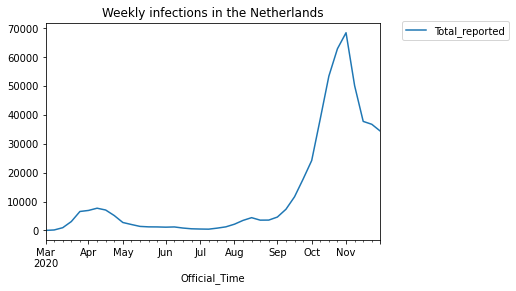

In [ ]:
# Determining weekly infections in the Netherlands
NL_weekly = DataNL.resample('W').sum()
NL_weekly.loc["2020-03-01":"2020-12-01"].plot(legend=True)
plt.title("Weekly infections in the Netherlands")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1.03))

In [ ]:
NL_weekly.sort_values(by ='Total_reported', ascending=False)[['Total_dreported']].head()       # Sorting the data from highest to lowest value
                                                                                              # Printing only the first 5 entries

,Total_reported
Official_Time,
2020-12-20,76286
2020-12-27,73280
2020-11-01,68458
2020-10-25,62920
2021-01-03,58280


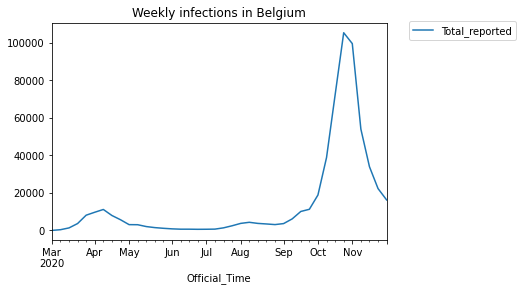

In [ ]:
# Determining weekly infections in Belgium
BE_weekly = DataBE.resample('W').sum()
BE_weekly.loc["2020-03-01":"2020-12-01"].plot(legend=True)
plt.title("Weekly infections in Belgium")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1.03))

In [ ]:
BE_weekly.sort_values(by ='Total_reported', ascending=False)[['Total_reported']].head()       # Sorting the data from highest to lowest value
                                                                                              # Printing only the first 5 entries

,Total_reported
Official_Time,
2020-10-25,105329
2020-11-01,99543
2020-10-18,72194
2020-11-08,53993
2020-10-11,38829


Text(0.5, 1.0, 'Difference in infection during the intelligent lockdown')

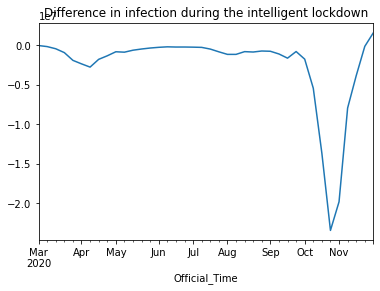

In [ ]:
# Showing the differences in weekly infections between the Netherlands and Belgium
infection_difference = DataNL["Total_reported"]-DataBE["Total_reported"]
difference_monthly = infection_difference.resample('W').sum()
difference_monthly.loc["2020-03-01":"2020-12-01"].plot(legend=False)
plt.title("Difference in infection during the intelligent lockdown")

In [ ]:
# Determining the biggest difference between the Netherlands and Belgium
min(NL_weekly.values-BE_weekly.values)

array([-42409])

We find from these graphs that the weekly infections in Belgium lie higher than those in the Netherlands, which can be observed from the negative values in the last graph. Furthermore, the tables show us that the highest weekly number of infections appear to be 105.329 in Belgium, while this is 76.286 in the Netherlands. Thus, the number of infections are consistently higher in Belgium, with a peak around the time where most infections take place. Here, the biggest difference is 42.409 positive cases in one week. 

## Mapping the Netherlands
For the upcoming part we try to visualise municipalities in the Netherlands and the amount of positive tested people. 
To create such a map, we use current Covid-19 data using the following link:

https://nlcovid-19-esrinl-content.hub.arcgis.com/datasets/covid-19-actuele-gegevens-rivm-vlakken.

Furthermore, we find the a page guiding us through the process of creating such a map
[here](https://medium.com/swlh/mapping-the-covid-19-outbreak-in-the-netherlands-cd0154842e5e#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6Ijc4M2VjMDMxYzU5ZTExZjI1N2QwZWMxNTcxNGVmNjA3Y2U2YTJhNmYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MTExNDkzNzEsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNzU0NjEwMDM0Nzg1NjAxNzIwMyIsImhkIjoidGlsYnVyZ3VuaXZlcnNpdHkuZWR1IiwiZW1haWwiOiJmLnAubC5kZWxvaWplckB0aWxidXJndW5pdmVyc2l0eS5lZHUiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkZsZXVyIGRlIExvaWplciIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vLWtWbTZ2dmJiU1QwL0FBQUFBQUFBQUFJL0FBQUFBQUFBQUFBL0FNWnV1Y2x5Tk0yR250aThuQjB0ZGstT3JJZHNMRWRlblEvczk2LWMvcGhvdG8uanBnIiwiZ2l2ZW5fbmFtZSI6IkZsZXVyIiwiZmFtaWx5X25hbWUiOiJkZSBMb2lqZXIiLCJpYXQiOjE2MTExNDk2NzEsImV4cCI6MTYxMTE1MzI3MSwianRpIjoiZTZiMjBjNDgyM2MzNjRjMDQ5ZTU2NDk5YTBjMzY5MGUyNThmNzUyYiJ9.VZ_WhQSi-M36h7M93OG3JNUvyXsf6l3qAdQecA0GIOq31HQEapYVF0vitWNhamB8kFg_gkDFBIB0VgG_UVxt39YDo09S3xJrVQUHeHL7rPHGA4byP15KI1i68hjdn7Uz5QOBy0zgp5Hw-yFowF4ZmTyH_oTf7teUTH50YnnlP4ES192rdaN7ndwZqmLSNzW41_ZNAu9OjZnCfoESLhTK-ZWDfZdmndzV-f_etOGRSYTooSHpSKXlfWKyi1Qm0QXPzkkjQOHQ056zsY_MtlH_OXTYq6tMxRAGJAVOkazL9FehRrBnS-DCaafUBZNySi0BnQjD_jA7JcKtxac3NMA7aw). Slight alterations are made to this code such that we learn from the code and observe what each line of code does. 

First, we install the necessary libraries.

In [ ]:
pip install git+git://github.com/geopandas/geopandas.git

In [ ]:
pip install mapclassify

In [ ]:
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt   
%matplotlib inline

current_url='https://opendata.arcgis.com/datasets/620c2ab925f64ed5979d251ba7753b7f_0.geojson'   # The source of our data
current_data = gpd.read_file(current_url) 

current_data.rename(                                        # Altering the titles of columns to English
    columns = {'Gemeentenaam':'Municipality', 
               'Gemeentecode':'MunicipalityCode',
               'Gemeentenummer':'MunicipalityNumber', 
               'Provincie':'Province', 
               'Provinciecode':'ProvinceCode',
               'Provincienummer':'ProvinceNumber',
               'Veiligheidsregio':'SecurityRegion',
               'Veiligheidsregiocode':'SecurityRegionCode',
               'Veiligheidsregionummer':'SecuretyRegionCode',
               'GGD_regio':'GGD_Region',
               'GGD_regiocode':'GGD_RegionCode',
               'GGD_regionummer':'GGD_RegionNumber',
               'Datum':'Date', 
               'Meldingen':'Reported',
               'Ziekenhuisopnamen':'Hospitalized',
               'Overleden':'Deaths',
               'Bevolkingsaantal':'Population',
               'Meldingen_100000':'Reported_100000', 
               'Ziekenhuisopnamen_100000':'Hospitalized_100000',
               'Overleden_100000':'Deaths_100000'},
    inplace = True)


Then we print data to give us an idea on the current highest and lowest corona case levels. This is to give us an overview of what kind of bins we need in the upcoming map.

In [ ]:
current_data.sort_values(by ='Reported_100000', ascending=False)[[      # Sorting the data from highest to lowest value
        'Municipality', 'Province', 'Reported_100000']].head()          # Printing only the first 5 entries

,Municipality,Province,Reported_100000
57,Bunschoten,Utrecht,12836.7
286,Tubbergen,Overijssel,9126.4
332,Wierden,Overijssel,8911.6
26,Barneveld,Gelderland,8871.5
293,Urk,Flevoland,8838.5


In [ ]:
current_data.sort_values(by ='Reported_100000', ascending=True)[[       # Sorting the data from lowest to highest value
        'Municipality', 'Province', 'Reported_100000']].head()          # Printing only the first 5 entries

,Municipality,Province,Reported_100000
259,Schiermonnikoog,Friesland,1056.0
123,Harlingen,Friesland,1921.1
281,Texel,Noord-Holland,2247.1
181,Loppersum,Groningen,2255.3
210,Noordenveld,Drenthe,2320.6


In [ ]:
current_data['Density']=current_data['Population']/current_data['Shape__Area']*1e6      # Creating a new variable: population density. 
    # Calculated by taking the level of population and deviding this by the size of the respective municipality.

current_data.sort_values(by ='Density', ascending=False)[[        # Sorting the data from highest to lowest value, using the new variable Density
        'Municipality', 'Province', 'Density']].head()            # Printing only the first 5 entries

,Municipality,Province,Density
0,'s-Gravenhage,Zuid-Holland,6358.993146
170,Leiden,Zuid-Holland,5370.946285
117,Haarlem,Noord-Holland,5079.925062
17,Amsterdam,Noord-Holland,4441.486057
59,Capelle aan den IJssel,Zuid-Holland,4355.075602


In [ ]:
current_data.sort_values(by ='Density', ascending=True)[[       # Sorting the data from lowest to highest value, using the new variable Density
        'Municipality', 'Province', 'Density']].head()          # Printing only the first 5 entries

,Municipality,Province,Density
259,Schiermonnikoog,Friesland,21.211082
308,Vlieland,Friesland,26.486383
280,Terschelling,Friesland,54.764162
254,Rozendaal,Gelderland,61.011942
14,Ameland,Friesland,63.011807


Now that we clearly see the values for population density and positive corona tests per municipality, we can plot this data on a map. Within this map, data is represented by colour. We use 6 different colours to represent different levels within a map. The guide we used for designing a map used only 5 colours. Though since that map has been made, the amount of positive corona tests has risen sharply. This causes the need for an extra colour in order to observe differences between municipalities more easily.

In [ ]:
# Creating a custom colourmap using 6 colours
def custom_div_cmap(numcolors=6, name='custom_div_cmap',
                    col1='white',col2='lavender',col3='violet',col4='mediumorchid', col5='darkviolet', col6='indigo'):

        from matplotlib.colors import LinearSegmentedColormap 

        cmap = LinearSegmentedColormap.from_list(name=name, 
                                        colors =[col1, col2, col3, col4, col5,col6],
                                            N=numcolors)
        return cmap

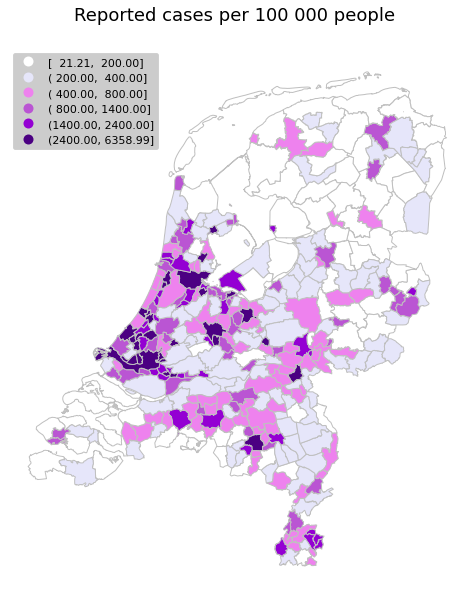

In [ ]:
fig, ax = plt.subplots(1, 1)           
fig.set_size_inches(10,10)                 # Setting the size of the map

cmap=custom_div_cmap(6, col1='white',col2='lavender',col3='violet',col4='mediumorchid', col5='darkviolet', col6='indigo')  


bins=[200,400,800,1400,2400]                # Selecting bins based on the highest and lowest levels given in the tables
current_data.plot(column='Density', ax=ax, edgecolor='silver',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 11, 'frameon':True})      # Setting the location of the legend

# Visualisation of the legend
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('silver')
labels = ax.get_legend().get_texts()


ax.axis('off')      # Removing the axes around the plot
ax.set_title('Reported cases per 100 000 people \n', fontsize=18)     # Setting a title
fig.savefig('Reported_NL.png', dpi=300)

plt.show()

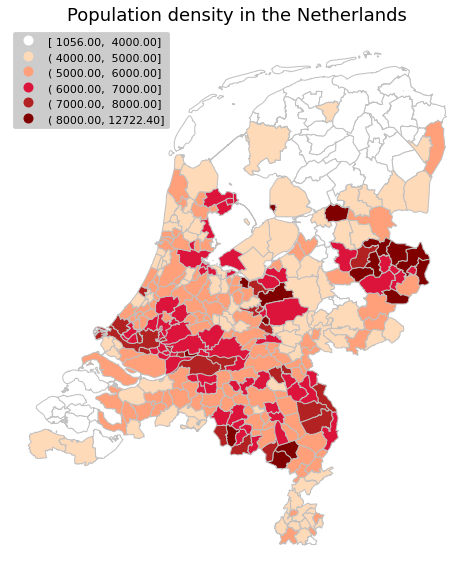

In [ ]:
fig, ax = plt.subplots(1, 1)           
fig.set_size_inches(10,10)                # Setting the size of the map

cmap=custom_div_cmap(6, col1='white',col2='peachpuff',col3='lightsalmon',col4='crimson', col5='firebrick', col6='maroon')  


bins=[4000,5000,6000,7000,8000]            # Selecting bins based on the highest and lowest levels given in the tables
current_data.plot(column='Reported_100000', ax=ax, edgecolor='silver',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 11, 'frameon':True})     # Setting the location of the legend

# Visualisation of the legend
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('silver')
labels = ax.get_legend().get_texts()


ax.axis('off')        # Removing the axes around the plot
ax.set_title('Population density in the Netherlands', fontsize=18)     # Setting a title
fig.savefig('Density_NL.png', dpi=300)

plt.show()

These two graphs show us the population density and the reported cases per municipality. It can be observed that more densely populated areas show more reported corona cases than low populated areas. This makes sense since the spread of the virus is easier in highly populated areas as more people are able to get in contact.


Thus, in the end we find that the number of cases are consistently higher in Belgium than in the Netherlands, where the difference grows when the positive corona cases tend to grow. The difference between the Netherlands and Belgium in this case is the implementation of an intelligent lockdown in the Netherlands, versus a strict lockdown in Belgium. Furthermore, the Netherlands is overall more densely populated than Belgium, and it appears in the maps above that more densely populated areas tend to experience more cases of corona than less densely populated areas. The difference in population density between the countries can thus not account for this big difference between the Netherlands and Belgium as Belgium is the one with more corona cases. 

# Sensitivity analysis



In our sensitivity analysis we broadened our time horizon in order to gain a better understanding of the overall trend, and how it was impacted by the different policies.
Here we can see how after the Netherlands adjusted its lockdown policy to be more strict like Belgium's, the infection numbers begin to overtake it.

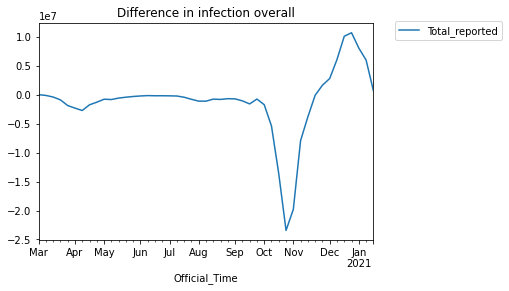

In [ ]:
difference_weekly = infection_difference.resample('W').sum()
difference_weekly.plot(legend=True)
plt.title("Difference in infection overall")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1.03))

# Discussion and conclusion 




We have concluded that the spread of infection over the period of the intelligent lockdown in the Netherlands is consistently lower than that of its more strict neighbour. The naive extrapolition to these findings would be that the intelligent lockdown is a more effective policy. However, no model that currently exists could explain that. It is likely that other factors are at play.
For future research we propose incorporating data using rule shirking among the population and the average incubation period before infection is discovered. This would give a better understanding on which policy would be more effective, or whether the type of policy did not play a significant role in the amount of corona cases in these countries. 